In [2]:
import numpy as np
import pandas as pd

from math import sqrt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.svm import SVR 

import seaborn as sns

/root/anaconda3/envs/learn-ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


read file

In [3]:
df = pd.read_csv('./house-data-set-cleaned-3.csv')

In [6]:
df_X = df.drop(columns=['Unnamed: 0', 'Price'], axis=1)
df_Y = df['Price']
# df_X.head()
df_Y.head()

0    12500000
1    29500000
2    19000000
3    35000000
4    29500000
Name: Price, dtype: int64

In [18]:
X = df_X
Y = df_Y

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.25,
    random_state=42
)

In [20]:
def model(pipeline, parameters, X_train, y_train, X, y, X_test, y_test):
    print('********************************************************************')
    grid_obj = GridSearchCV(estimator= pipeline,
                            param_grid = parameters,
                            cv =3,
                            verbose = 2,
                            n_jobs =1,
                            refit=True,
                            error_score='raise'
                            )
    print(X_train)
    grid_obj.fit(X_train, y_train)
    
    results = pd.DataFrame(pd.DataFrame(grid_obj.cv_results_))
    results_sorted = results.sort_values(by=['mean_test_score'], ascending=False)

    print("#### Results")
    print(results_sorted)
    print(grid_obj)
    print("best index", grid_obj.best_index_)
    print("best score", grid_obj.best_score_)
    print("best params", grid_obj.best_params_)

    estimator = grid_obj.best_estimator_

    print(estimator)
    # if estimator.named_steps['scl'] == True:
    #     X = (X - X.mean())/ (X.std())
    #     y = (y - y.mean())/ (y.std())

    shuffle = KFold(n_splits =3,
                    shuffle=True,
                    random_state =10)
    cv_scores = cross_val_score(estimator, X, y.values.ravel(), cv=shuffle, scoring='r2')
    print("#### CV Results")
    print("mean score", cv_scores.mean())
    
    estimator.fit(X_train,y_train)
    y_p = estimator.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_p))
    print(r2_score(y_p, y_test))
    plt.scatter(y_p, y_test)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], "g--", lw=1, alpha=0.4)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")
    plt.title('Predicted prices (LKR) vs. True prices (LKR) (Test-Train Split)')
    plt.show()
    
    '''Show model coefficients or feature importances'''

    try:
        print("Model coefficients: ", list(zip(list(X), estimator.named_steps['clf'].coef_)))
    except:
        print("Model does not support model coefficients")

    try:
        print("Feature importances: ", list(zip(list(X), estimator.named_steps['clf'].feature_importances_)))
    except:
        print("Model does not support feature importances")

    '''Predict along CV and plot y vs. y_predicted in scatter'''

    y_pred = cross_val_predict(estimator, X, y, cv=shuffle)
    
    plt.scatter(y, y_pred)
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    plt.plot([xmin, xmax], [ymin, ymax], "g--", lw=1, alpha=0.4)
    plt.xlabel("True prices")
    plt.ylabel("Predicted prices")
    # plt.annotate(' R-squared CV = {}'.format(round(float(cv_scores.mean()), 3)), size=9,
    #          xy=(xmin,ymax), xytext=(10, -15), textcoords='offset points')
    # plt.annotate(grid_obj.best_params_, size=9,
    #              xy=(xmin, ymax), xytext=(10, -35), textcoords='offset points', wrap=True)
    plt.title('Predicted prices (LKR) vs. True prices (LKR) (KFold)')
    plt.show()
    rmse = sqrt(mean_squared_error(y, y_pred))
    print('rmse: ', rmse)
    print('*********************************************************************')



In [21]:
pipe_forest = Pipeline([('clf', RandomForestRegressor())])
param_forest = {'clf__n_estimators': [10, 20, 50, 70, 100, 120, 130,140, 150, 200],
                'clf__max_features': [None, 1, 2,3],
                'clf__max_depth': [1, 2, 5, 10, 15, 20, 25]}

In [22]:
pipe_neural = Pipeline([('scl', StandardScaler()),
                        ('clf', MLPRegressor())])

param_neural = {'clf__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                'clf__hidden_layer_sizes': [(5),(10,10),(7,7,7),(20, 20,20, 20), (30,30, 30), (20, 20,20), (15, 15,15)],
                'clf__solver': ['lbfgs'],
                'clf__activation': ['relu', 'tanh'],
                'clf__learning_rate' : ['constant', 'invscaling']}


In [23]:
params_lr = {'fit_intercept':[True,False], 'normalize':[True,False]}


In [26]:
pipe_knn = Pipeline([('clf', KNeighborsRegressor())])
param_knn = {'clf__n_neighbors':[5, 10, 15, 25, 30]}

      Location  Beds  Baths  House Size  Land Size
3317        29     4      2      2700.0        7.3
691         33     2      1      1200.0       18.0
533         38     5      4      3800.0        7.8
6364        20     4      2      1500.0       10.0
6763        28     4      4      4100.0       10.0
...        ...   ...    ...         ...        ...
5191        35     3      1      1600.0       20.0
5226        26     4      3      4500.0       11.2
5390        36     5      3      3200.0       17.0
860         20     2      1      1250.0        7.5
7270         1     3      2      1200.0        6.8

[5682 rows x 5 columns]
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] fit_intercept=True, normalize=True ..............................
[CV] ............... fit_intercept=True, normalize=True, total=   0.0s
[CV] fit_intercept=True, normalize=True ..............................
[CV] ............... fit_intercept=True, normalize=True, total=   0.0s
[CV] fit_intercept=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished


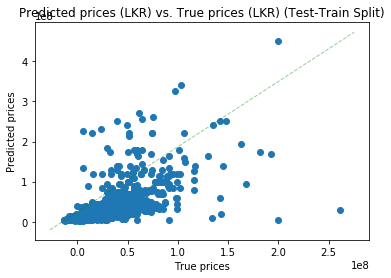

*********************************************************************
r2 :  -0.44787514981888865
best:  {'fit_intercept': True, 'normalize': False}
rmse:  27589108.976735163
*********************************************************************
Model does not support model coefficients
Model does not support feature importances


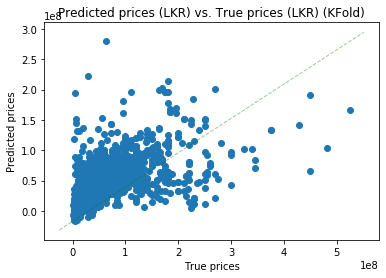

*********************************************************************
r2 :  0.402
best:  {'fit_intercept': True, 'normalize': False}
rmse:  26561970.722480897
*********************************************************************


In [27]:
model(linear_model.LinearRegression(), params_lr, X_train, Y_train, X, Y, X_test, Y_test)


# model(pipe_forest, param_forest, X_train, Y_train, X, Y, X_test, Y_test)
# model(pipe_neural, param_neural, X_train, Y_train, X, Y, X_test, Y_test)

      Location  Beds  Baths  House Size  Land Size
3317        29     4      2      2700.0        7.3
691         33     2      1      1200.0       18.0
533         38     5      4      3800.0        7.8
6364        20     4      2      1500.0       10.0
6763        28     4      4      4100.0       10.0
...        ...   ...    ...         ...        ...
5191        35     3      1      1600.0       20.0
5226        26     4      3      4500.0       11.2
5390        36     5      3      3200.0       17.0
860         20     2      1      1250.0        7.5
7270         1     3      2      1200.0        6.8

[5682 rows x 5 columns]
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] clf__n_neighbors=5 ..............................................
[CV] ............................... clf__n_neighbors=5, total=   0.0s
[CV] clf__n_neighbors=5 ..............................................
[CV] ............................... clf__n_neighbors=5, total=   0.0s
[CV] clf__n_neighbo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. clf__n_neighbors=25, total=   0.0s
[CV] clf__n_neighbors=25 .............................................
[CV] .............................. clf__n_neighbors=25, total=   0.0s
[CV] clf__n_neighbors=25 .............................................
[CV] .............................. clf__n_neighbors=25, total=   0.0s
[CV] clf__n_neighbors=30 .............................................
[CV] .............................. clf__n_neighbors=30, total=   0.0s
[CV] clf__n_neighbors=30 .............................................
[CV] .............................. clf__n_neighbors=30, total=   0.0s
[CV] clf__n_neighbors=30 .............................................
[CV] .............................. clf__n_neighbors=30, total=   0.0s
#### Results
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.004788      0.000073         0.009925        0.000020   
2       0.004683      0.000050         0.011404        0.000232   
3    

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


Test train split
0.0557433665534961


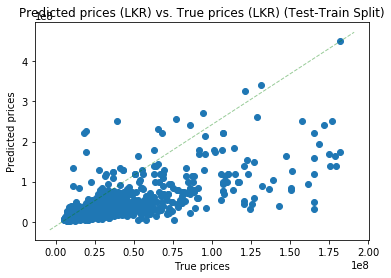

*********************************************************************
r2 :  0.0557433665534961
best:  {'clf__n_neighbors': 10}
rmse:  24001667.1122748
*********************************************************************
Model does not support model coefficients
Model does not support feature importances


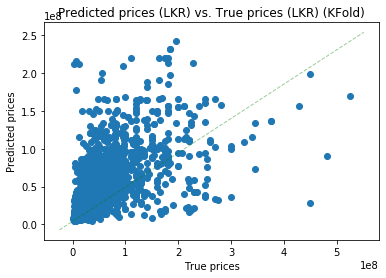

*********************************************************************
r2 :  0.463
best:  {'clf__n_neighbors': 10}
rmse:  25178704.025507025
*********************************************************************


In [28]:
 model(pipe_knn, param_knn, X_train, Y_train, X, Y, X_test, Y_test)

      Location  Beds  Baths  House Size  Land Size
3317        29     4      2      2700.0        7.3
691         33     2      1      1200.0       18.0
533         38     5      4      3800.0        7.8
6364        20     4      2      1500.0       10.0
6763        28     4      4      4100.0       10.0
...        ...   ...    ...         ...        ...
5191        35     3      1      1600.0       20.0
5226        26     4      3      4500.0       11.2
5390        36     5      3      3200.0       17.0
860         20     2      1      1250.0        7.5
7270         1     3      2      1200.0        6.8

[5682 rows x 5 columns]
Fitting 3 folds for each of 280 candidates, totalling 840 fits
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=10 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=10, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=10 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=10, tota

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=20, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=50 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=50 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=50 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=50, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=70 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=70, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=70 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=70, total=   0.1s
[CV] clf__max_depth=1, clf__max_features=None, clf__n_estimators=70 ..
[CV]  clf__max_depth=1, clf__max_features=None, clf__n_estimators=70, 

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  5.2min finished


#### Results
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
237       0.730645      0.005378         0.051140        0.000216   
235       0.642995      0.014254         0.044389        0.000130   
275       0.660078      0.005494         0.045584        0.000116   
204       0.731616      0.004624         0.036986        0.000273   
234       0.523401      0.002454         0.036963        0.000073   
..             ...           ...              ...             ...   
12        0.067412      0.003471         0.005985        0.001022   
17        0.183912      0.006937         0.011401        0.000075   
14        0.233178      0.079270         0.011560        0.003806   
13        0.139398      0.051329         0.014253        0.010153   
10        0.015083      0.000189         0.002358        0.000058   

    param_clf__max_depth param_clf__max_features param_clf__n_estimators  \
237                   20                       3                     140   
235   

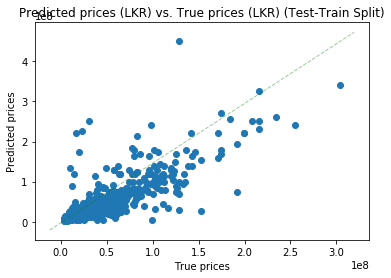

*********************************************************************
r2 :  0.5369888998598593
best:  {'clf__max_depth': 20, 'clf__max_features': 3, 'clf__n_estimators': 140}
rmse:  19059040.725985855
*********************************************************************
Model does not support model coefficients
Feature importances:  [('Location', 0.22424410185780802), ('Beds', 0.0647402438759029), ('Baths', 0.1095054849049464), ('House Size', 0.3627529149653182), ('Land Size', 0.23875725439602452)]


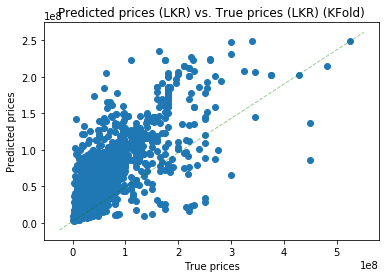

*********************************************************************
r2 :  0.671
best:  {'clf__max_depth': 20, 'clf__max_features': 3, 'clf__n_estimators': 140}
rmse:  19511428.091292564
*********************************************************************


In [29]:
model(pipe_forest, param_forest, X_train, Y_train, X, Y, X_test, Y_test)


      Location  Beds  Baths  House Size  Land Size
3317        29     4      2      2700.0        7.3
691         33     2      1      1200.0       18.0
533         38     5      4      3800.0        7.8
6364        20     4      2      1500.0       10.0
6763        28     4      4      4100.0       10.0
...        ...   ...    ...         ...        ...
5191        35     3      1      1600.0       20.0
5226        26     4      3      4500.0       11.2
5390        36     5      3      3200.0       17.0
860         20     2      1      1250.0        7.5
7270         1     3      2      1200.0        6.8

[5682 rows x 5 columns]
Fitting 3 folds for each of 168 candidates, totalling 504 fits
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.8s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.6s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.8s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.9s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.9s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.6s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.0s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.7s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.7s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.6s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.9s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solv

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.6s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.6s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.7s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   2.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   3.3s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   2.4s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=relu, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=5, clf__learning_rat

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activ

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.001, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__act

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.0s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__h

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   2.9s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   2.6s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=t

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.01, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tan

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidde

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__acti

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=tanh, clf_

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=5, clf__learning_r

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=1, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_ra

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   2.8s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.3s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=10, 

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=10, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=5, clf__learning_rate=invscaling, c

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(10, 10), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(7, 7, 7), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.7s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tan

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.5s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.0s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.4s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.2s
[CV] clf__activation=tanh, clf_

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   1.1s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(30, 30, 30), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   2.1s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=tanh, clf__a

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(20, 20, 20), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   1.7s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs 


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=100, clf__hidden_layer_sizes=(15, 15, 15), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s


[Parallel(n_jobs=1)]: Done 504 out of 504 | elapsed:  5.4min finished
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Results
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10        0.971784      0.120816         0.005269        0.003580   
25        0.879321      0.020342         0.002716        0.000052   
55        0.732722      0.031331         0.002615        0.000025   
69        0.887806      0.049760         0.003384        0.001097   
16        0.407977      0.006256         0.002570        0.000375   
..             ...           ...              ...             ...   
130       0.201452      0.044536         0.002192        0.000111   
116       0.054953      0.004424         0.002049        0.000052   
72        0.393467      0.020651         0.002062        0.000025   
67        0.698753      0.383100         0.002637        0.000058   
68        0.318343      0.322665         0.002415        0.000054   

    param_clf__activation param_clf__alpha param_clf__hidden_layer_sizes  \
10                   relu            0.001                  (20, 20, 20)   
25    

/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed t

#### CV Results
mean score 0.5138389261710116
Test train split
-3.305482222270231


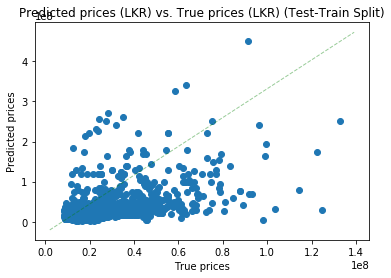

*********************************************************************
r2 :  -3.305482222270231
best:  {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (20, 20, 20), 'clf__learning_rate': 'constant', 'clf__solver': 'lbfgs'}
rmse:  31163900.030862525
*********************************************************************
Model does not support model coefficients
Model does not support feature importances


/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/root/anaconda3/envs/learn-ml/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed t

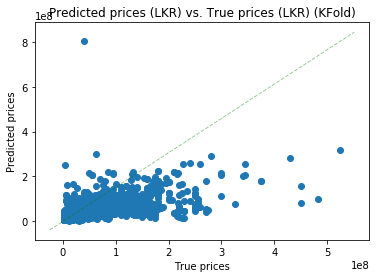

*********************************************************************
r2 :  0.514
best:  {'clf__activation': 'relu', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (20, 20, 20), 'clf__learning_rate': 'constant', 'clf__solver': 'lbfgs'}
rmse:  25505416.339804363
*********************************************************************


In [30]:
model(pipe_neural, param_neural, X_train, Y_train, X, Y, X_test, Y_test)